In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Sam\Python\Amazon\amzn-trxns.csv')
df_items = pd.read_csv(r'C:\Users\Sam\Python\Amazon\amzn-items.csv')
df.columns

Index(['Order Date', 'Order ID', 'Payment Instrument Type', 'Website',
       'Purchase Order Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Subtotal', 'Shipping Charge',
       'Tax Before Promotions', 'Total Promotions', 'Tax Charged',
       'Total Charged', 'Buyer Name', 'Group Name'],
      dtype='object')

In [2]:
columns_to_remove = ['Buyer Name',
                     'Carrier Name & Tracking Number',
                     'Purchase Order Number',
                     'Shipping Address Name',
                     'Payment Instrument Type',
                     'Website',
                     'Ordering Customer Email',
                     'Group Name',
                     'Shipping Address Street 1',
                     'Shipping Address Street 2',
                     'Shipping Address Zip']

columns_to_keep = df.columns.difference(columns_to_remove)
cleaned_df = df[columns_to_keep]
cleaned_df.head()

,Order Date,Order ID,Order Status,Shipment Date,Shipping Address City,Shipping Address State,Shipping Charge,Subtotal,Tax Before Promotions,Tax Charged,Total Charged,Total Promotions
0,12/17/07,002-3871585-0473815,Shipped,12/19/07,Winter Springs,FL,$9.95,$24.99,$0.00,$0.00,$34.94,$0.00
1,02/14/11,105-2774147-7005846,Shipped,02/14/11,ATLANTA,GA,$4.98,$35.76,$0.00,$0.00,$30.40,$10.34
2,03/02/11,105-8999275-0190627,Shipped,03/02/11,ATLANTA,GA,$6.26,$13.82,$0.00,$0.00,$11.75,$8.33
3,10/17/11,002-2703902-8732222,Shipped,10/19/11,ATLANTA,GA,$0.00,$42.97,$0.00,$0.00,$36.52,$6.45
4,12/15/11,103-1421655-8005866,Shipped,12/15/11,ATLANTA,GA,$0.00,$17.80,$0.00,$0.00,$17.80,$0.00


In [3]:
cleaned_df2 = cleaned_df.copy()

columns_to_num = ['Shipping Charge',
                 'Subtotal',
                 'Tax Before Promotions',
                 'Tax Charged',
                 'Total Charged',
                 'Total Promotions']

cleaned_df2[columns_to_num] = cleaned_df2[columns_to_num].applymap(lambda x: float(x[1:]))
cleaned_df2.head()

,Order Date,Order ID,Order Status,Shipment Date,Shipping Address City,Shipping Address State,Shipping Charge,Subtotal,Tax Before Promotions,Tax Charged,Total Charged,Total Promotions
0,12/17/07,002-3871585-0473815,Shipped,12/19/07,Winter Springs,FL,9.95,24.99,0.0,0.0,34.94,0.00
1,02/14/11,105-2774147-7005846,Shipped,02/14/11,ATLANTA,GA,4.98,35.76,0.0,0.0,30.40,10.34
2,03/02/11,105-8999275-0190627,Shipped,03/02/11,ATLANTA,GA,6.26,13.82,0.0,0.0,11.75,8.33
3,10/17/11,002-2703902-8732222,Shipped,10/19/11,ATLANTA,GA,0.00,42.97,0.0,0.0,36.52,6.45
4,12/15/11,103-1421655-8005866,Shipped,12/15/11,ATLANTA,GA,0.00,17.80,0.0,0.0,17.80,0.00


In [4]:
cleaned_df2['Order Date'] = pd.to_datetime(cleaned_df2['Order Date'])
cleaned_df2['Month'] = cleaned_df2['Order Date'].map(lambda x: x.month)
cleaned_df2['Year'] = cleaned_df2['Order Date'].map(lambda x: x.year)
cleaned_df2['Month Year'] = cleaned_df2.apply(lambda row: dt.date(year = row.Year,month = row.Month,day=1), axis = 1)
cleaned_df2.head()

,Order Date,Order ID,Order Status,Shipment Date,Shipping Address City,Shipping Address State,Shipping Charge,Subtotal,Tax Before Promotions,Tax Charged,Total Charged,Total Promotions,Month,Year,Month Year
0,2007-12-17,002-3871585-0473815,Shipped,12/19/07,Winter Springs,FL,9.95,24.99,0.0,0.0,34.94,0.00,12,2007,2007-12-01
1,2011-02-14,105-2774147-7005846,Shipped,02/14/11,ATLANTA,GA,4.98,35.76,0.0,0.0,30.40,10.34,2,2011,2011-02-01
2,2011-03-02,105-8999275-0190627,Shipped,03/02/11,ATLANTA,GA,6.26,13.82,0.0,0.0,11.75,8.33,3,2011,2011-03-01
3,2011-10-17,002-2703902-8732222,Shipped,10/19/11,ATLANTA,GA,0.00,42.97,0.0,0.0,36.52,6.45,10,2011,2011-10-01
4,2011-12-15,103-1421655-8005866,Shipped,12/15/11,ATLANTA,GA,0.00,17.80,0.0,0.0,17.80,0.00,12,2011,2011-12-01


In [5]:
%matplotlib inline

In [54]:
monthly_orders = pd.DataFrame(cleaned_df2.groupby('Month Year').sum()["Total Charged"])
monthly_orders

,Total Charged
Month Year,
2007-12-01,34.94
2011-02-01,30.40
2011-03-01,11.75
2011-10-01,36.52
2011-12-01,40.02
2012-01-01,76.19
2012-02-01,66.20
2012-04-01,40.91
2012-05-01,7.85


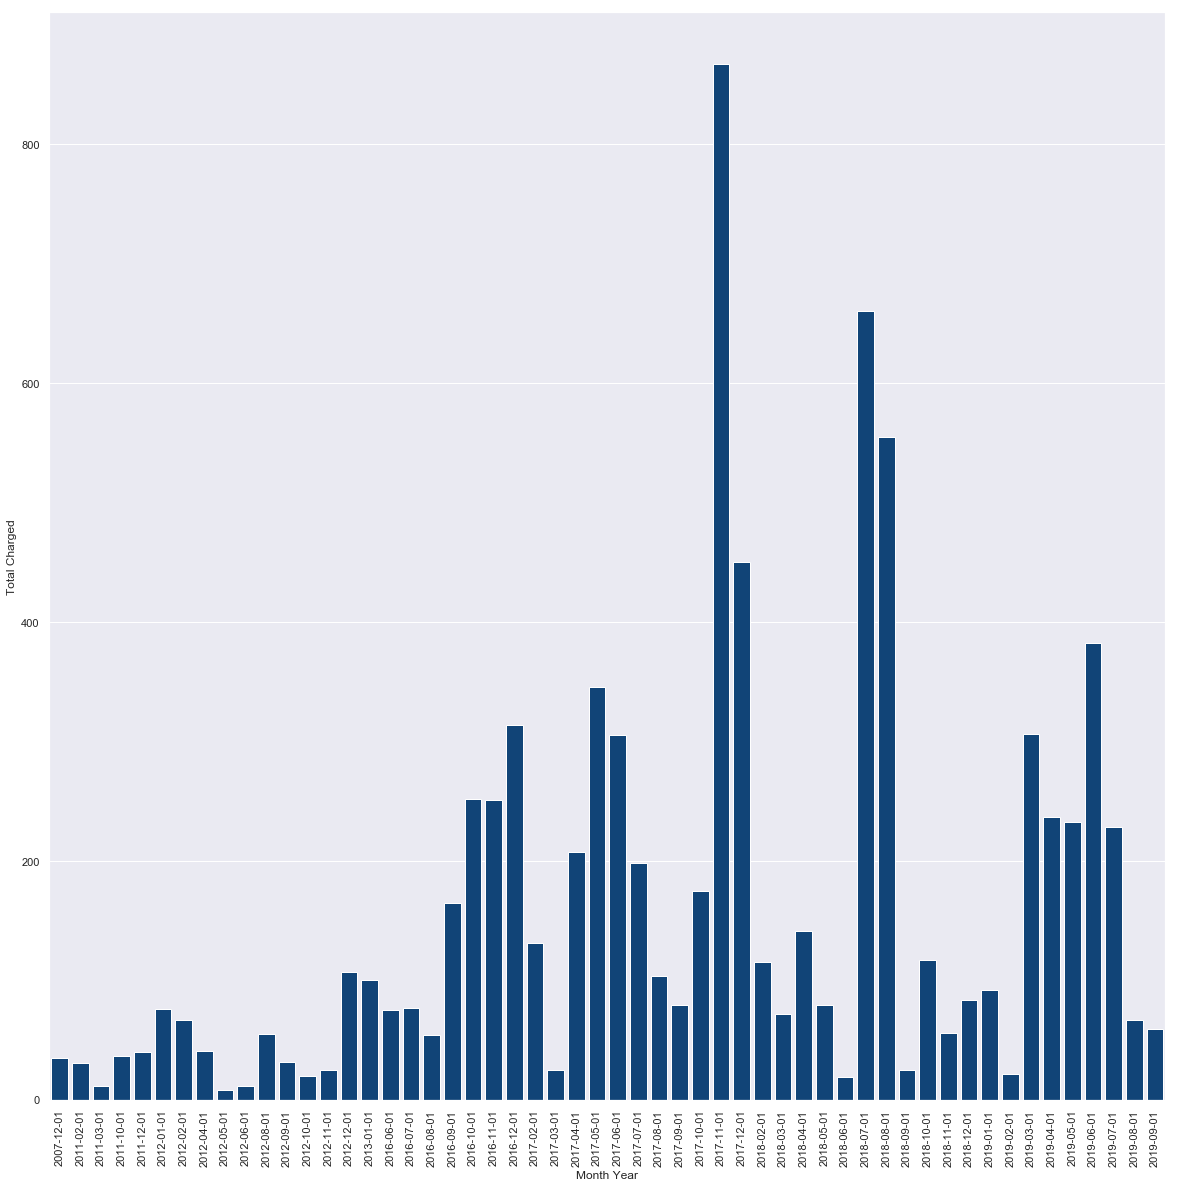

In [55]:
sns.set(style="darkgrid", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x = monthly_orders.index,
            y = monthly_orders['Total Charged'], 
            color='#004488',
            ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()
sns.set()

In [8]:
df_details = df_items.copy()
df_details = df_details[['Order ID','Category','Seller']]

df_details.head()

,Order ID,Category,Seller
0,002-3871585-0473815,Watch,American Watch Corporation
1,105-2774147-7005846,Health and Beauty,Amazon.com
2,105-8999275-0190627,Grocery,Amazon.com
3,002-2703902-8732222,Health and Beauty,Amazon.com
4,103-1421655-8005866,Kitchen,Amazon.com


In [9]:
final_df = pd.merge(cleaned_df2, df_details, on='Order ID', how='left')
final_df

,Order Date,Order ID,Order Status,Shipment Date,Shipping Address City,Shipping Address State,Shipping Charge,Subtotal,Tax Before Promotions,Tax Charged,Total Charged,Total Promotions,Month,Year,Month Year,Category,Seller
0,2007-12-17,002-3871585-0473815,Shipped,12/19/07,Winter Springs,FL,9.95,24.99,0.00,0.00,34.94,0.00,12,2007,2007-12-01,Watch,American Watch Corporation
1,2011-02-14,105-2774147-7005846,Shipped,02/14/11,ATLANTA,GA,4.98,35.76,0.00,0.00,30.40,10.34,2,2011,2011-02-01,Health and Beauty,Amazon.com
2,2011-03-02,105-8999275-0190627,Shipped,03/02/11,ATLANTA,GA,6.26,13.82,0.00,0.00,11.75,8.33,3,2011,2011-03-01,Grocery,Amazon.com
3,2011-10-17,002-2703902-8732222,Shipped,10/19/11,ATLANTA,GA,0.00,42.97,0.00,0.00,36.52,6.45,10,2011,2011-10-01,Health and Beauty,Amazon.com
4,2011-12-15,103-1421655-8005866,Shipped,12/15/11,ATLANTA,GA,0.00,17.80,0.00,0.00,17.80,0.00,12,2011,2011-12-01,Kitchen,Amazon.com
5,2011-12-26,105-4550702-0050634,Shipped,12/27/11,ATLANTA,GA,0.00,22.22,0.00,0.00,22.22,0.00,12,2011,2011-12-01,Kitchen,Amazon.com
6,2012-01-25,103-5084995-1366651,Shipped,01/25/12,ATLANTA,GA,0.00,66.60,0.00,0.00,66.60,0.00,1,2012,2012-01-01,Health and Beauty,Amazon.com
7,2012-01-25,103-5084995-1366651,Shipped,01/25/12,ATLANTA,GA,0.00,66.60,0.00,0.00,66.60,0.00,1,2012,2012-01-01,Kitchen,Amazon.com
8,2012-01-25,103-5084995-1366651,Shipped,01/25/12,ATLANTA,GA,0.00,66.60,0.00,0.00,66.60,0.00,1,2012,2012-01-01,Health and Beauty,Amazon.com
9,2012-01-25,103-5084995-1366651,Shipped,01/25/12,ATLANTA,GA,0.00,9.59,0.00,0.00,9.59,0.00,1,2012,2012-01-01,Health and Beauty,Amazon.com


In [33]:
orders_by_category = pd.DataFrame(final_df.groupby('Category').sum()["Total Charged"].sort_values(ascending=False))
orders_by_category['Total Charged']

Category
Health and Beauty           1927.55
Apparel                     1336.33
Electronics                 1207.36
Kitchen                     1202.24
Baby Product                 920.42
Misc.                        846.05
Tools & Home Improvement     688.39
Video Game                   471.38
Personal Computers           446.14
Office Product               332.19
Grocery                      295.90
Sports                       235.64
Shoes                        149.74
Hardcover                    137.29
Toy                          136.26
Lawn & Patio                 123.17
Wireless Phone Accessory     117.20
Paperback                     96.87
Unknown Binding               85.18
Automotive                    47.99
Jewelry                       44.92
Watch                         34.94
Spiral-bound                  25.47
Software Download             23.64
Battery                        7.01
Blu-ray                        6.96
Print Magazine                 0.99
Name: Total Charged

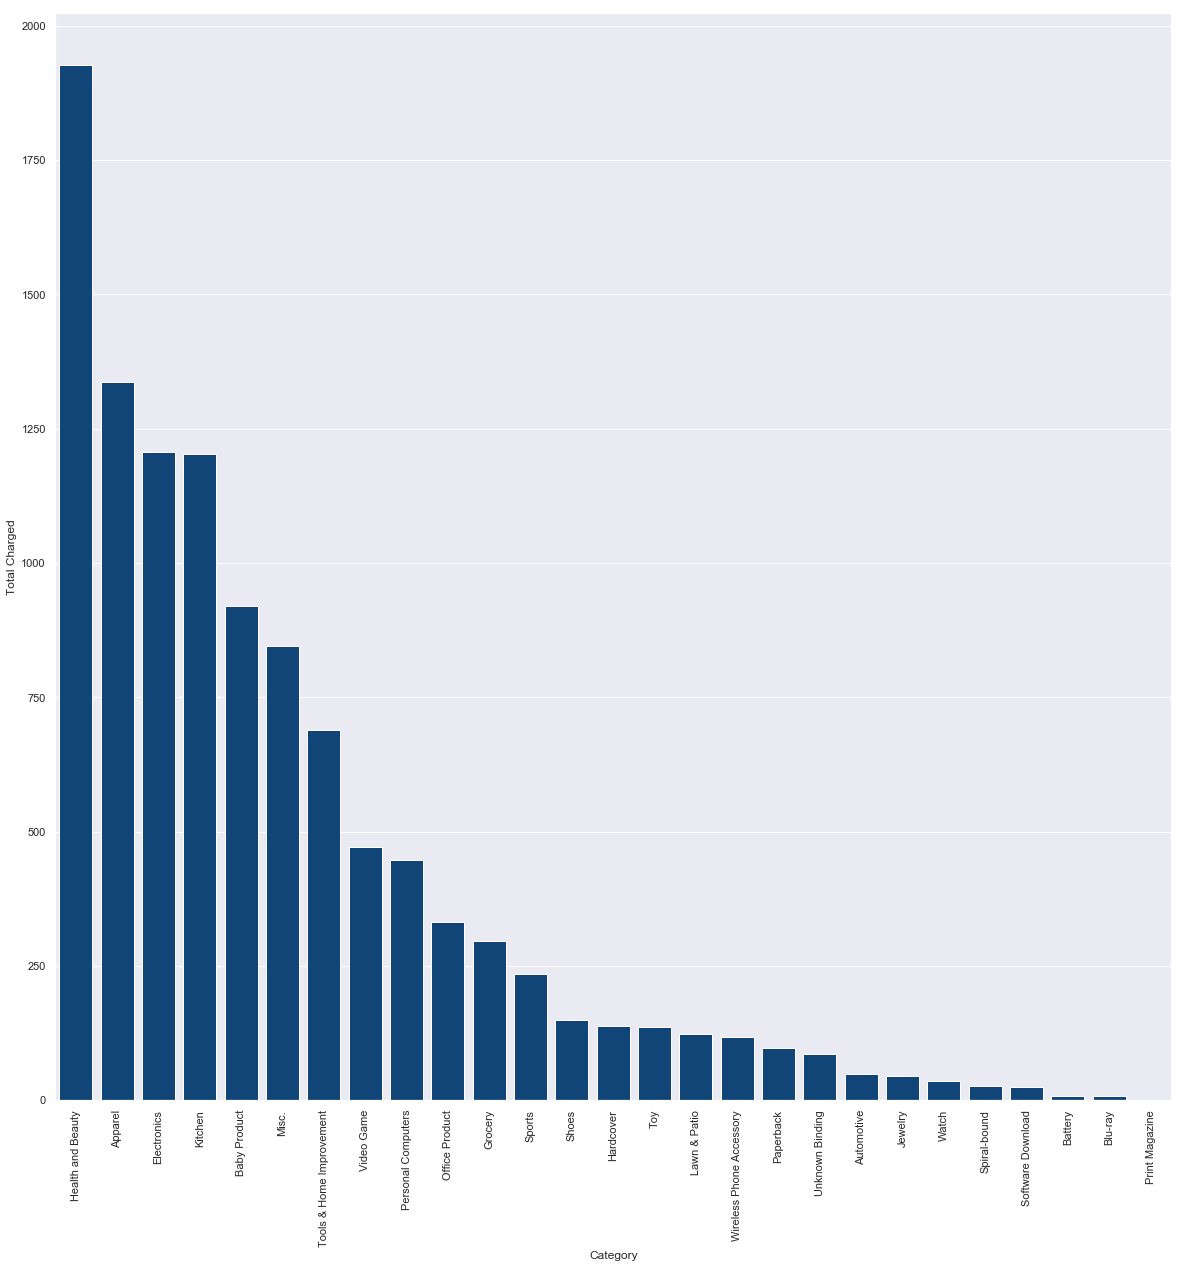

In [53]:
sns.set(style="darkgrid", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x = orders_by_category.index,
            y = orders_by_category['Total Charged'], 
            color='#004488',
            ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()
sns.set()